In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [82]:
data_name = "transformed_business_im"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

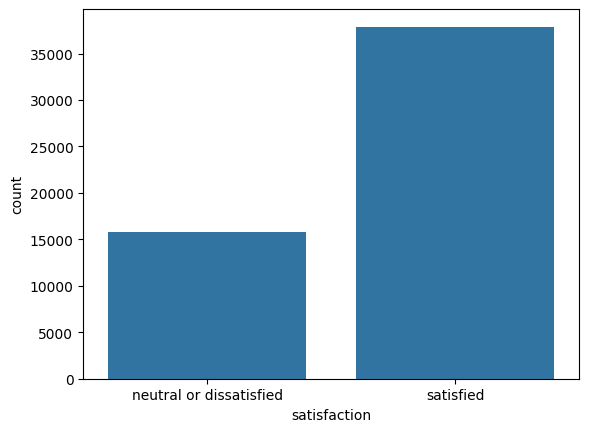

In [83]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [84]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53714,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,39,404,0
53715,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,52,280,0
53716,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,1,34,526,0
53717,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,23,646,0


In [85]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
53714    neutral or dissatisfied
53715                  satisfied
53716    neutral or dissatisfied
53717                  satisfied
53718                  satisfied
Name: satisfaction, Length: 53719, dtype: object

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (37603, 77) and test set is :(16116, 77)


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.20685694, -0.47094479, -0.53044051, ...,  0.7329855 ,
         1.01603759, -0.39213549],
       [-0.20685694, -0.47094479,  1.88522554, ..., -0.91191218,
        -0.84894383, -0.53324318],
       [-0.20685694, -0.47094479, -0.53044051, ...,  0.26301474,
        -1.03447017, -0.53324318],
       ...,
       [-0.20685694, -0.47094479, -0.53044051, ...,  1.90791242,
         0.78192102, -0.53324318],
       [-0.20685694,  2.12339114, -0.53044051, ..., -1.46021141,
         0.74834959, -0.53324318],
       [-0.20685694, -0.47094479, -0.53044051, ..., -0.59859834,
        -0.71112426, -0.53324318]])

## Set paramiter CV

In [88]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.157839 วินาที


In [90]:
#Predict the accuracy of the model
y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 93.41 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89      4742
              satisfied       0.96      0.95      0.95     11374

               accuracy                           0.93     16116
              macro avg       0.92      0.92      0.92     16116
           weighted avg       0.93      0.93      0.93     16116



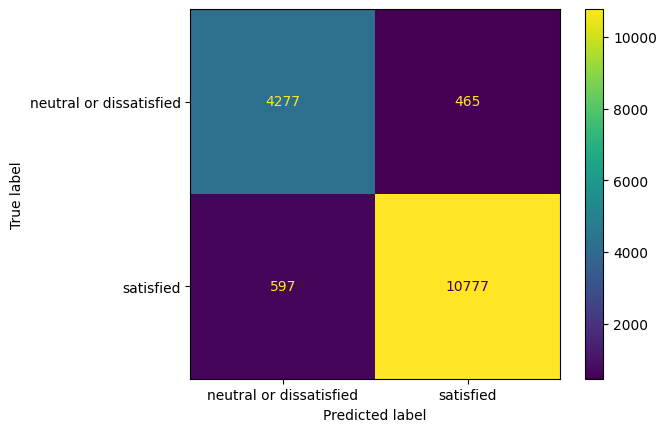

In [91]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

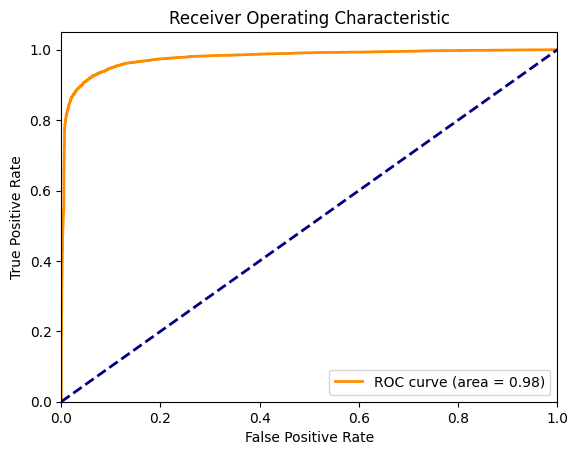

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_lr.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [93]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")


Cross Validation Scores (Logistic Regression): [0.94016753 0.94056641 0.94654966 0.93737535 0.93498205 0.93418428
 0.9361787  0.93179099 0.93577982 0.94495413 0.93936976 0.93817312
 0.94295971 0.93575419 0.93814844]
Mean CV Accuracy: 0.9385
Standard Deviation CV Accuracy: 0.0039
เวลาที่ใช้ในการทำ Cross Validation: 2.462625 วินาที


In [94]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9390474164295401
Test Accuracy: 0.9341027550260611


## Save Model Predic

In [95]:
import pickle
pickle_out = open("../../pipelines/model_LR_business.pkl", mode = "wb")
pickle.dump(model_lr, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_LR.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [96]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
7735,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,55,1162,2,satisfied
20619,0,0,1,0,0,0,0,0,1,0,...,1,0,1,1,0,1,27,1158,0,neutral or dissatisfied
34686,0,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,25,1009,1,satisfied
30493,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,19,2172,0,neutral or dissatisfied
51866,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,25,373,0,satisfied
1019,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,22,868,7,neutral or dissatisfied
2476,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,47,1645,7,satisfied
15634,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,56,2871,1,neutral or dissatisfied
1997,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,42,680,22,satisfied
31188,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,51,3388,0,satisfied


In [97]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
7735,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,55,1162,2
20619,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,27,1158,0
34686,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,25,1009,1
30493,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,19,2172,0
51866,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,25,373,0
1019,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,22,868,7
2476,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,47,1645,7
15634,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,56,2871,1
1997,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,42,680,22
31188,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,51,3388,0


In [98]:
y_sam = df_sam.iloc[:,-1]
y_sam


7735                   satisfied
20619    neutral or dissatisfied
34686                  satisfied
30493    neutral or dissatisfied
51866                  satisfied
1019     neutral or dissatisfied
2476                   satisfied
15634    neutral or dissatisfied
1997                   satisfied
31188                  satisfied
26974                  satisfied
45220    neutral or dissatisfied
52163                  satisfied
4934                   satisfied
27180                  satisfied
47944    neutral or dissatisfied
46644                  satisfied
46589                  satisfied
16293                  satisfied
10159                  satisfied
Name: satisfaction, dtype: object

In [99]:
model = pickle.load(open("../../pipelines/model_LR_business.pkl", 'rb'))
scaler_LR = pickle.load(open("../../pipelines/scaler_LR.pkl", 'rb'))

scaler_new = scaler_LR.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of LR is : {round(accuracy_KNN*100,2)} % .")

['satisfied' 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied']
Accuracy of LR is : 90.0 % .
